# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data loading**

In [2]:
data = pd.read_csv("multiple_linear_regression.csv")

In [3]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# **Data Preprocessing**

In [5]:
data = data.dropna()
data.shape

(200, 4)

In [6]:
output_col = "Target"

In [7]:
x = data.iloc[:,data.columns != output_col] # input

In [8]:
x.head()

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [9]:
y = data.loc[:,output_col]    # output

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = 43)

In [11]:
data.shape

(200, 4)

In [12]:
x_train.shape

(140, 3)

In [13]:
y_train.shape

(140,)

# **Multiple Linear Regression**

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [15]:
regressor.coef_

array([ 0.0459782 ,  0.18092867, -0.00194226])

In [16]:
regressor.intercept_

3.0777744955280415

# **prediction**

In [17]:
pred_value = regressor.predict(x_test)

# **cost**

In [18]:
from sklearn.metrics import mean_squared_error
cost = mean_squared_error(y_test, pred_value)

In [19]:
cost

2.241286253093347

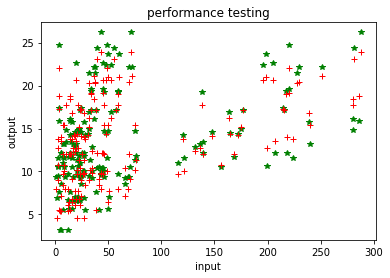

In [20]:
plt.plot(x_test, y_test, "*", color = "green")
plt.plot(x_test,pred_value,"+", color = "red")
plt.title("performance testing")
plt.xlabel("input")
plt.ylabel("output")
plt.show()

# **ASSUMPTIONS OF LINEAR REGRESSION**

# **Homoscedasticity**

In [21]:
pred_value

array([ 8.41710143, 15.36146115, 12.08619274,  9.75953058, 11.37799221,
       18.73526253, 23.94158412,  7.11931733, 22.06606191, 16.83172907,
        7.93115903, 23.07243791, 19.15729792,  5.47677475, 15.42102256,
        9.82205717, 12.08023645,  9.76094922, 21.07717663,  9.13945016,
       20.36205828, 12.03862691, 13.78082146, 10.73225482, 16.20061541,
        7.77042699, 20.6251206 , 20.31966315,  8.97266008, 14.13746173,
       17.28381353, 15.13827164, 17.18376843, 19.03374633, 17.13952183,
       12.14670527, 12.7815946 ,  6.08135492, 10.06634988, 13.48921606,
       12.01549843,  9.70107337,  5.35398678, 10.14966171, 14.224196  ,
       14.04780871, 14.33053495, 10.39465714, 21.04417964, 13.74703482,
        6.4651166 ,  7.90550808, 17.69866554, 17.74668208, 12.39498913,
       12.69345805, 20.58946722, 18.4269009 ,  4.59145621,  6.82129794])

In [22]:
residulas = y_test - pred_value

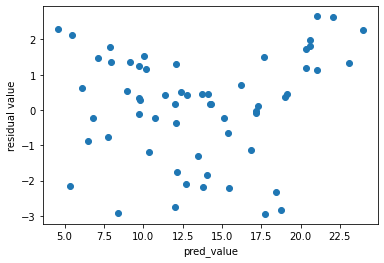

In [23]:
plt.scatter(pred_value, residulas)
plt.xlabel("pred_value")
plt.ylabel("residual value")
plt.show()               # here we can say there is no relation between them according to our assumptiona

# **NORMALITY OF RESIDUALS**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


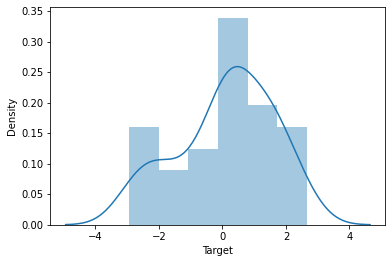

In [24]:
sns.distplot(residulas);